In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-score-dataset-linear-regression/student_scores.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/kaggle/input/students-score-dataset-linear-regression/student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.dropna(inplace=True)

In [7]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

<AxesSubplot: xlabel='Hours', ylabel='Scores'>

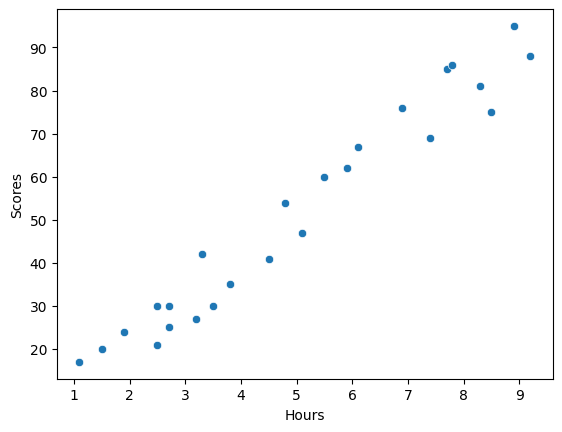

In [8]:
sns.scatterplot(x='Hours', y='Scores', data=data)

In [9]:
train_data, test_data = train_test_split(data, test_size = 0.33, random_state = 42)

In [10]:
print(train_data)

    Hours  Scores
5     1.5      20
2     3.2      27
12    4.5      41
15    8.9      95
3     8.5      75
4     3.5      30
20    2.7      30
17    1.9      24
21    4.8      54
18    6.1      67
24    7.8      86
7     5.5      60
10    7.7      85
14    1.1      17
19    7.4      69
6     9.2      88


In [11]:
print(test_data)

    Hours  Scores
8     8.3      81
16    2.5      30
0     2.5      21
23    6.9      76
11    5.9      62
9     2.7      25
13    3.3      42
1     5.1      47
22    3.8      35


In [12]:
x_train = train_data["Hours"]
y_train = train_data["Scores"]

In [13]:
print(x_train)

5     1.5
2     3.2
12    4.5
15    8.9
3     8.5
4     3.5
20    2.7
17    1.9
21    4.8
18    6.1
24    7.8
7     5.5
10    7.7
14    1.1
19    7.4
6     9.2
Name: Hours, dtype: float64


In [14]:
print(y_train)

5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64


In [15]:
x_train = train_data.Hours.values.reshape(-1,1)
y_train = train_data.Scores.values.reshape(-1,1)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
x_test = test_data["Hours"]
y_train = test_data["Scores"]
x_test = test_data.Hours.values.reshape(-1,1)
y_test = test_data.Scores.values.reshape(-1,1)

In [18]:
y_pred = model.predict(x_test)

In [19]:
print(y_pred)

[[83.50244409]
 [27.53075726]
 [27.53075726]
 [69.99203692]
 [60.34174609]
 [29.46081542]
 [35.25098992]
 [52.62151342]
 [40.07613534]]


In [20]:
print(y_test)

[[81]
 [30]
 [21]
 [76]
 [62]
 [25]
 [42]
 [47]
 [35]]


In [21]:
Accuracy = r2_score(y_test, y_pred)
print("Accuracy Score:", Accuracy*100)

Accuracy Score: 94.35488190277577


In [22]:
mean_squared_error(y_test, y_pred)

24.074686364260987

In [23]:
mean_absolute_error(y_test, y_pred)

4.564015037730867